In [1]:
import os
import glob
import torch
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from einops import rearrange
from PIL import Image
from deepface import DeepFace

In [2]:
DeepFace.verify("../data/img1.jpg", "../data/img8.jpg", model_name="Facenet")

{'verified': True,
 'distance': 0.2204041458955489,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 259, 'y': 87, 'w': 126, 'h': 126},
  'img2': {'x': 188, 'y': 38, 'w': 128, 'h': 128}},
 'time': 15.46}

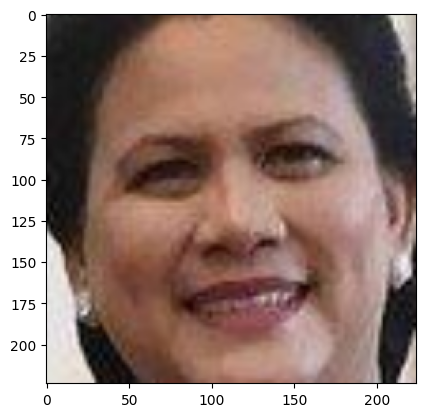

In [3]:
import matplotlib.pyplot as plt

hasil = DeepFace.extract_faces( "../data/img3.jpg")
plt.imshow(hasil[0]["face"])

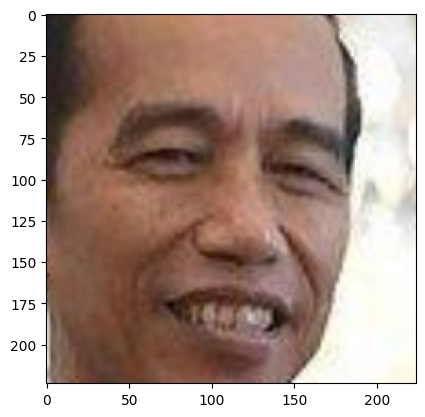

In [4]:
plt.imshow(hasil[1]["face"])

Action: gender: 100%|██████████| 2/2 [00:00<00:00, 11.10it/s]


(-0.5, 223.5, 223.5, -0.5)

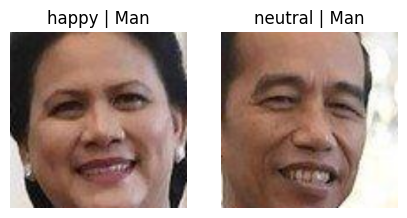

In [5]:
hasil_1 = hasil[1]["face"]

result = DeepFace.analyze("../data/img3.jpg", actions=("emotion", "gender"))

fig, ax = plt.subplots(1, 2, figsize=(5, 10))
ax[0].imshow(hasil[0]["face"])
ax[1].imshow(hasil[1]["face"])
ax[0].set_title(f"{result[0]['dominant_emotion']} | {result[0]['dominant_gender']}")
ax[1].set_title(f"{result[1]['dominant_emotion']} | {result[1]['dominant_gender']}")
ax[0].axis("off")
ax[1].axis("off")

In [6]:
def cos_sim(a, b):
    a = np.array(a[0]["embedding"])
    b = np.array(b[0]["embedding"])
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

person_1 = hasil[1]["face"]
person_1_juga = DeepFace.extract_faces( "../data/img1.jpg")

# nggak pake backend karena udah di crop -> untuk meyakinkan kalo itu wajah yang dimaksud
embed_1 = DeepFace.represent(person_1, model_name="Facenet", detector_backend="skip")
embed_2 = DeepFace.represent(person_1_juga[0]["face"], model_name="Facenet", detector_backend="skip")

cos_sim(embed_1, embed_2)

0.8990562295931955

In [10]:
torch.tensor(embed_2[0]["embedding"])

tensor([ 1.1597, -0.9715, -1.2143, -2.0676,  1.0867, -0.0777,  0.1308,  0.6536,
         1.0153,  0.9381, -0.4095,  1.5527,  0.5423, -2.9408, -0.2704, -0.4100,
        -0.6687, -0.4182,  1.4287, -1.0432,  1.7144, -0.4922, -1.5545,  0.5650,
        -2.7607, -1.4744,  0.2544,  0.0773, -0.2346,  0.2346,  0.7117, -0.1090,
         1.7931, -2.3023, -1.1970, -0.9974, -1.2901, -0.3324,  0.4520, -1.4947,
        -0.6423,  0.8262, -0.7752, -1.8589, -1.5742, -0.9847,  0.4807, -0.3891,
        -1.4926, -0.4750, -1.2308,  0.7270, -0.3074, -0.9070,  1.3733,  0.7418,
        -0.3275,  0.9846, -0.9098, -1.5251, -1.5632, -1.4362,  0.9826,  0.4060,
         0.2110,  0.8443,  1.0578,  0.5178, -0.8366, -0.5053,  0.8857, -0.6396,
        -0.3686, -0.8002,  0.3218,  0.2452, -2.1481,  0.6971, -1.0117, -1.2863,
        -0.6584, -1.0224, -0.1846, -1.2343, -0.2172,  0.1865, -1.2934,  0.3055,
         0.9101,  0.1756,  0.5621, -0.6490, -0.2541,  1.4645,  0.5150, -0.4476,
        -2.4254, -1.3761,  0.0085, -0.17